In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#!wget https://www.kaggle.com/api/v1/datasets/download/rohitgrewal/hr-data-mnc

In [3]:
#!unzip hr-data-mnc -d hr_data

In [4]:
df = pd.read_csv('hr_data/HR_Data_MNC_Data Science Lovers.csv')

# Keep 30% data = 500k rows for processing
df = df.sample(frac=0.3, random_state=42)

# Delete not importance cols
df = df.drop(['Unnamed: 0', 'Employee_ID', 'Full_Name'], axis=1)

df.columns = df.columns.str.lower().str.replace(' ','_')
strings = list(df.dtypes[df.dtypes == 'object'].index)
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ','_')

# I just want to get country out of location information
df['location'] = df['location'].str.split(',_').str[-1]
# I am Vietnamese so i want to convert salary from INR to VND
df['salary_vnd'] = round(df['salary_inr'] * 296.77, 0)
# Create a new field hire_year instead of hire_date
df['hire_date'] = pd.to_datetime(df['hire_date'], errors='coerce') 
df['hire_year'] = df['hire_date'].dt.year

del df['salary_inr']
del df['hire_date']

In [5]:
df.isnull().sum()

department            0
job_title             0
location              0
performance_rating    0
experience_years      0
status                0
work_mode             0
salary_vnd            0
hire_year             0
dtype: int64

In [6]:
categories = df.columns[df.dtypes == 'object'].tolist()

In [7]:
for col in categories:
    print(df[col].value_counts())
    print()

department
it            179939
sales         120238
operations     89898
marketing      71952
finance        60277
hr             47599
r&d            30097
Name: count, dtype: int64

job_title
software_engineer                90102
sales_executive                  59923
operations_executive             45023
account_manager                  36162
marketing_executive              35887
data_analyst                     35729
accountant                       30215
devops_engineer                  27109
logistics_coordinator            26879
hr_executive                     23638
seo_specialist                   21540
business_development_manager     18158
financial_analyst                18103
it_manager                       17918
research_scientist               15096
talent_acquisition_specialist    14441
supply_chain_manager             13489
content_strategist               10889
cto                               9081
finance_manager                   9013
product_developer        

In [8]:
df['hire_year'].value_counts()

hire_year
2022    60350
2024    59857
2023    59856
2021    59553
2020    52515
2016    48334
2017    48253
2019    48074
2018    48069
2025    36696
2015    25902
2014    12152
2011    12034
2013    11993
2012    11839
2010     4523
Name: count, dtype: int64

In [9]:
df[['experience_years', 'hire_year']].corr()

,experience_years,hire_year
experience_years,1.000000,-0.991074
hire_year,-0.991074,1.000000


In [10]:
#Given the similarity between the two fields, experiences_years and hire_year, I decided to drop the hire_year field.
del df['hire_year']

<Axes: xlabel='salary_vnd', ylabel='Count'>

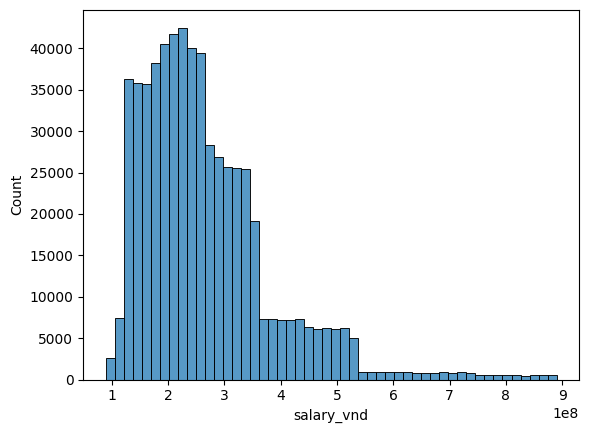

In [11]:
%matplotlib inline
sns.histplot(df.salary_vnd, bins=50)

It seems like my data has fallen into a long-tail case.

<Axes: xlabel='salary_vnd', ylabel='Count'>

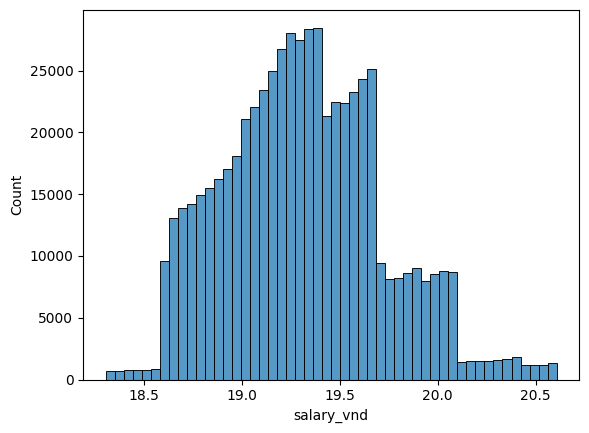

In [12]:
# I will narrow the range of values by applying log1p to the target column.
sns.histplot(np.log1p(df['salary_vnd']), bins=50)

Better now

In [13]:
df['performance_rating'].value_counts()

performance_rating
4    120288
3    120196
1    119950
2    119948
5    119618
Name: count, dtype: int64

In [14]:
# I think performance_rating is not like numerical type, its more like categorical. So i will change it into categorical column by change the values
performance_rating_values = {
    1: 'rating1',
    2: 'rating2',
    3: 'rating3',
    4: 'rating4',
    5: 'rating5'
}

In [15]:
df.performance_rating = df.performance_rating.map(performance_rating_values)
df

,department,job_title,location,performance_rating,experience_years,status,work_mode,salary_vnd
1828401,it,devops_engineer,south_georgia_and_the_south_sandwich_islands,rating2,3,active,remote,140650580.0
1200071,it,software_engineer,bosnia_and_herzegovina,rating2,4,active,on-site,316452083.0
194849,it,software_engineer,greenland,rating4,7,active,on-site,184822124.0
1629054,hr,talent_acquisition_specialist,samoa,rating3,13,active,remote,281166724.0
191144,sales,account_manager,denmark,rating5,3,active,remote,129407152.0
...,...,...,...,...,...,...,...,...
1573340,finance,accountant,jordan,rating1,9,terminated,on-site,224015944.0
1963164,hr,hr_manager,liberia,rating3,7,active,remote,421909896.0
1771309,r&d,research_scientist,barbados,rating3,9,resigned,remote,296434650.0
794110,it,software_engineer,guatemala,rating4,6,resigned,on-site,217386993.0


In [16]:
#Everything seem good now. Let's export it out as a csv file for training
#df.to_csv("data_prepared.csv", index=False, encoding='utf-8-sig')